In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
cd ..

/Users/alphonsowoodbury/DS/mod2project/flatiron_mod2_project_kch


In [3]:
#importing data
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
#data cleaning:
#changing question marks to 0.0
df = df.replace('?', 0.0)

#changing all column object types to floats (except date column)
df.loc[:, df.columns != 'date'] = df.loc[:,df.columns != 'date'].astype('float')

#changing all 0.0 in sqft_basement column, yr_renovated, and waterfront columns to NaN values
df['sqft_basement'] = df['sqft_basement'].replace(0.0 , np.nan)
df['waterfront'] = df.waterfront.replace(0.0, np.nan)
df['yr_renovated'] =df['yr_renovated'].replace(0.0, np.nan)
#changing date column to datetime values
df['date'] = pd.to_datetime(df['date'])

In [5]:
#Feature Engineering:
#creating has_basement, has_waterfront, has_renovation columns with True/False values
df['has_waterfront'] = df['waterfront'].notnull()
df['has_basement'] = df['sqft_basement'].notnull()
df['has_renovation'] = df['yr_renovated'].notnull()
#creating eff_built column (which updates built year depending on whether it was renovated or not)
df.loc[df['yr_renovated'].notnull(), 'eff_built'] = df['yr_renovated']
df.loc[df['yr_renovated'].isnull(), 'eff_built'] = df['yr_built']

In [6]:
#Creating new dataframe with desired columns:
df = df[['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built','zipcode',\
         'sqft_living15','sqft_lot15','has_basement','has_waterfront','has_renovation','eff_built']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
id                21597 non-null float64
date              21597 non-null datetime64[ns]
price             21597 non-null float64
bedrooms          21597 non-null float64
bathrooms         21597 non-null float64
sqft_living       21597 non-null float64
sqft_lot          21597 non-null float64
floors            21597 non-null float64
condition         21597 non-null float64
grade             21597 non-null float64
yr_built          21597 non-null float64
zipcode           21597 non-null float64
sqft_living15     21597 non-null float64
sqft_lot15        21597 non-null float64
has_basement      21597 non-null bool
has_waterfront    21597 non-null bool
has_renovation    21597 non-null bool
eff_built         21597 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(14)
memory usage: 2.5 MB


In [7]:
df_normal_check = df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built','zipcode',\
         'sqft_living15','sqft_lot15']]

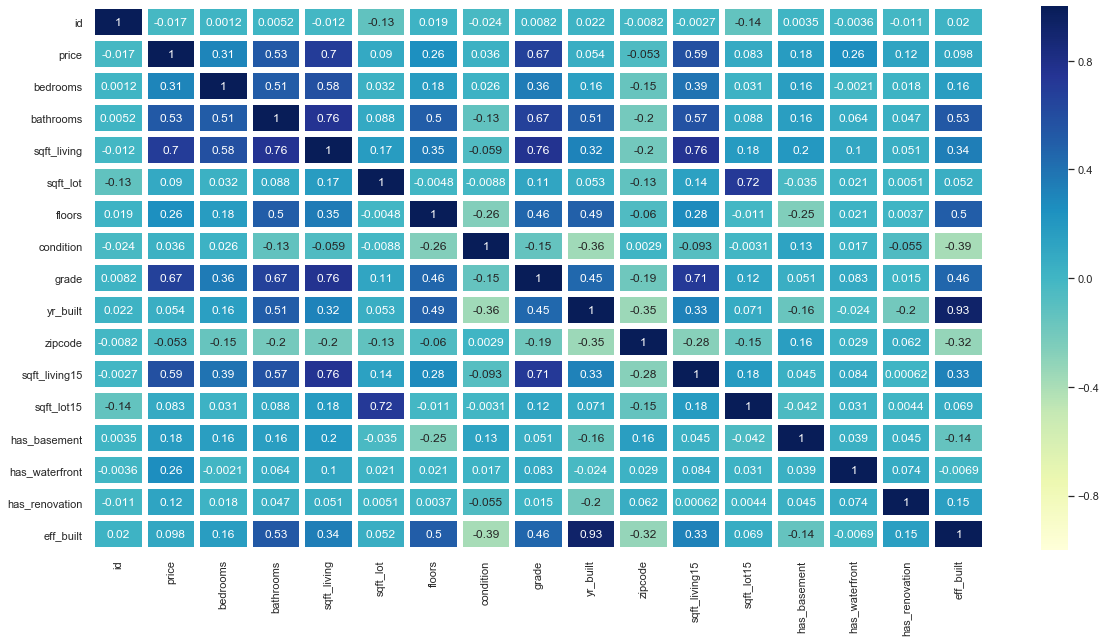

In [8]:
#Correlation Heatmap
df_corr = df.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(df_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True, cmap = 'YlGnBu' )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
#creating dummy variables:
